In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [223]:
#pip install xlrd

# TRAIN DATA

In [224]:
data = pd.read_excel('C:/Users/HP/Documents/DataTrained/Evaluated Projects/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [225]:
data.shape

(10683, 11)

In [226]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [227]:
data.dropna(inplace = True)

In [228]:
data.isna().sum().sum()

0

In [229]:
data.shape

(10682, 11)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Let's visualize the features to understand the dataset better

The value counts for Airline is

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 



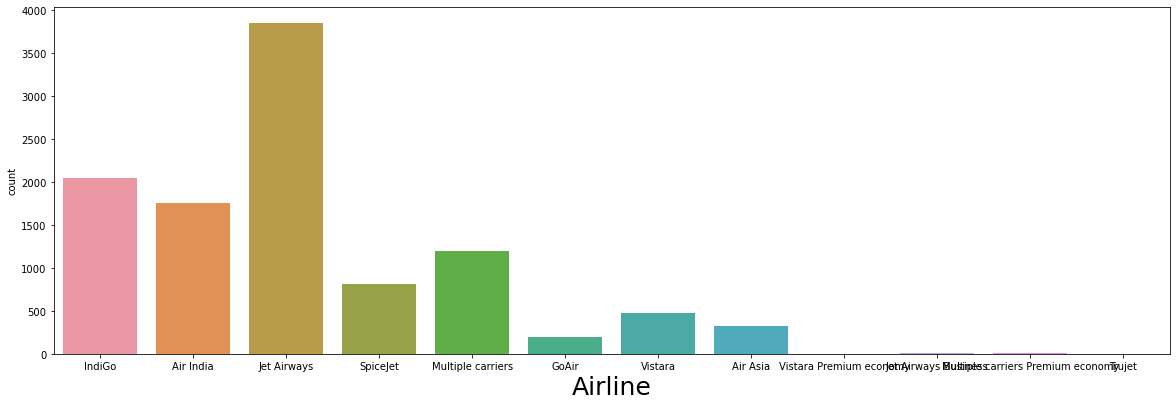

The value counts for Date_of_Journey is

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64 



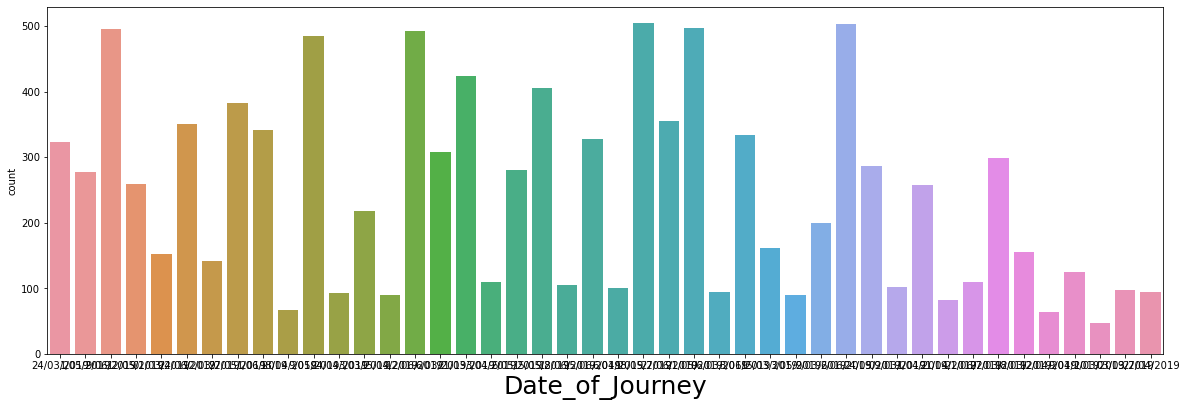

The value counts for Source is

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 



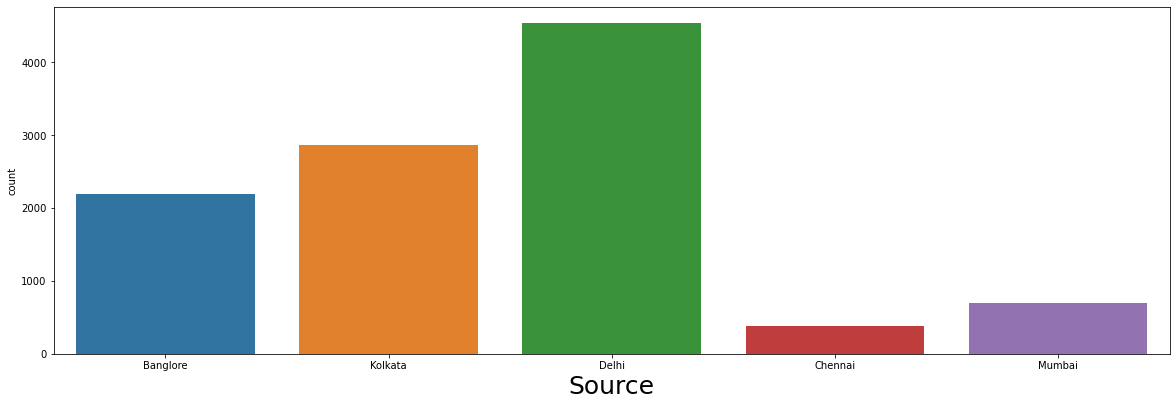

The value counts for Destination is

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 



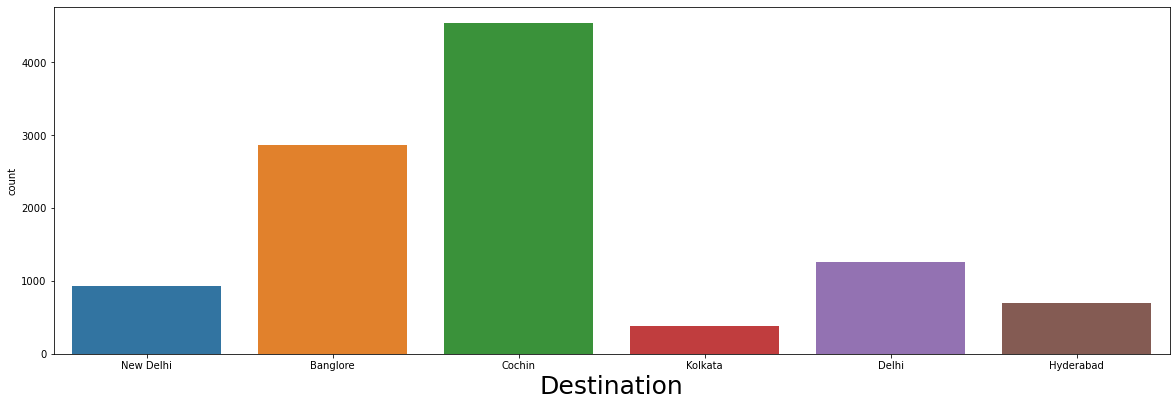

The value counts for Route is

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64 



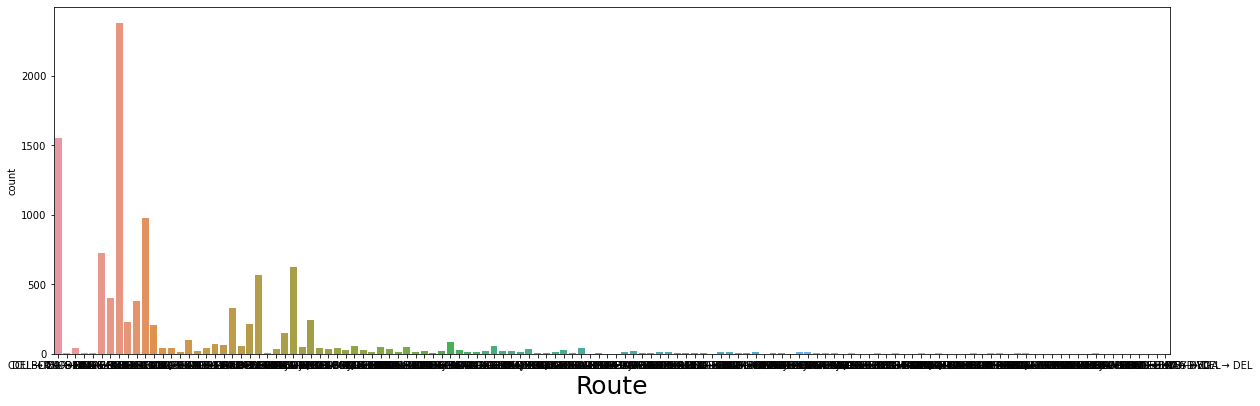

The value counts for Dep_Time is

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64 



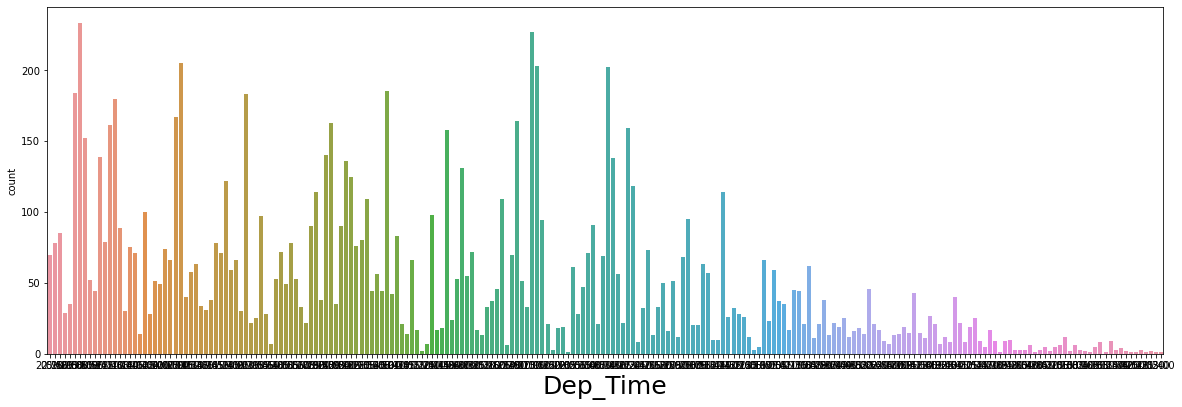

The value counts for Arrival_Time is

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64 



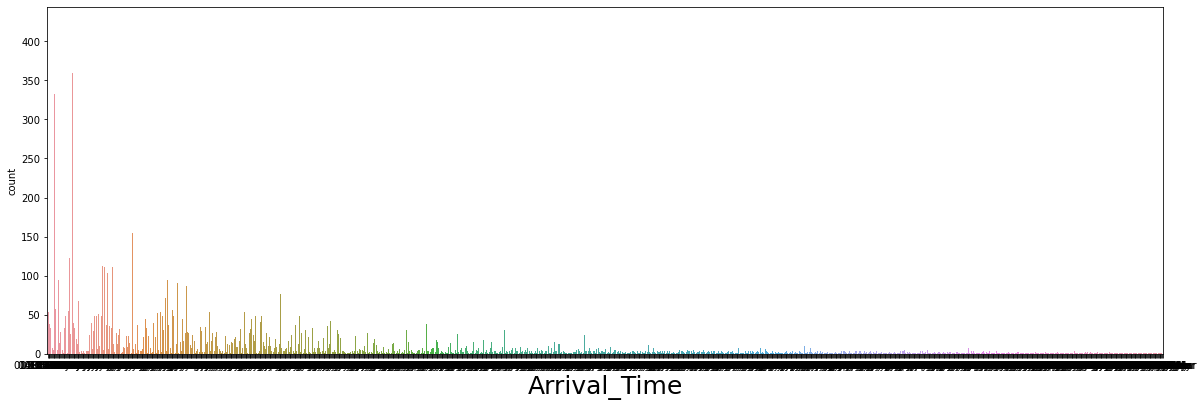

The value counts for Duration is

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64 



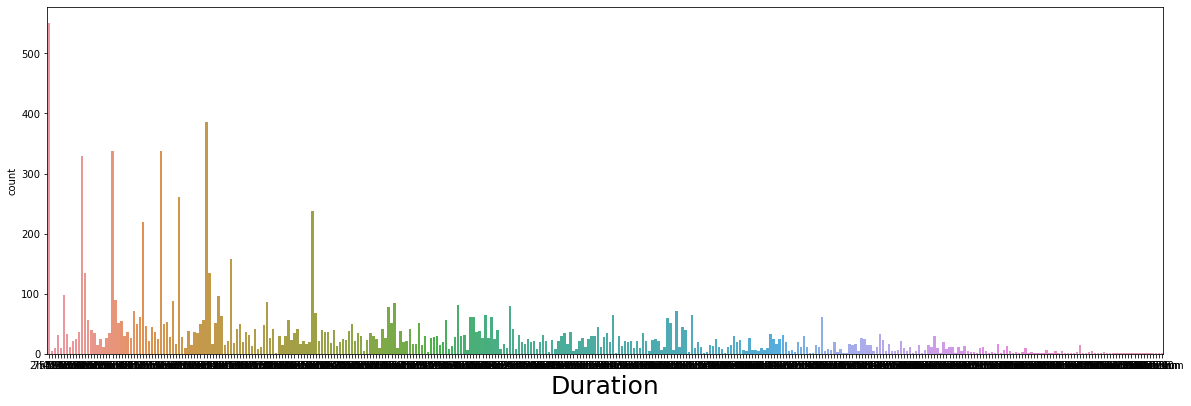

In [231]:
data_cat = data.drop(columns=['Price','Total_Stops','Additional_Info'], axis = 1)

plotnumber = 1

for column in data_cat :
    plt.figure(figsize = (20,60))
    if plotnumber <=8:
        ax = plt.subplot(8,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

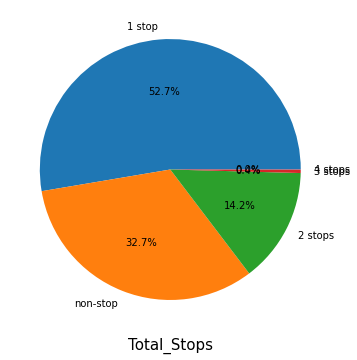

<Figure size 432x288 with 0 Axes>

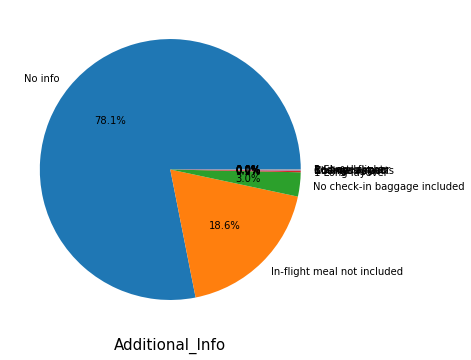

<Figure size 432x288 with 0 Axes>

In [232]:
data1 = data[['Total_Stops','Additional_Info']]

for i in data1:
    plt.figure(figsize=(8,6))
    data[i].value_counts().plot.pie(autopct='%1.1f%%')
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('')
    plt.figure()

**Prices of different Airlines depends on various factors :**
- Type of Airline
- Destination
- Duration of flight
- Total stops and some other minor factors

**Analysis :**
- Jet Airways has the most number of airlines followed by Indigo and Air India.
- 18th May has the most number of journey
- Source of departure is the most for Delhi followed by Kolkata and Bangalore
- Cochin Airport has received the most number of destination followed by Bangalore and Delhi
- The most number of flight duration is almost 3 hrs.
- More than half of the passengers prefer 1-stop flight and around $2/3$rd of them prefer non-stop flight.
- Almost 1/5th of the passengers did not want to include in-flight meals.

### Encoding the data

In [233]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [234]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302


### Checking multicollinearity

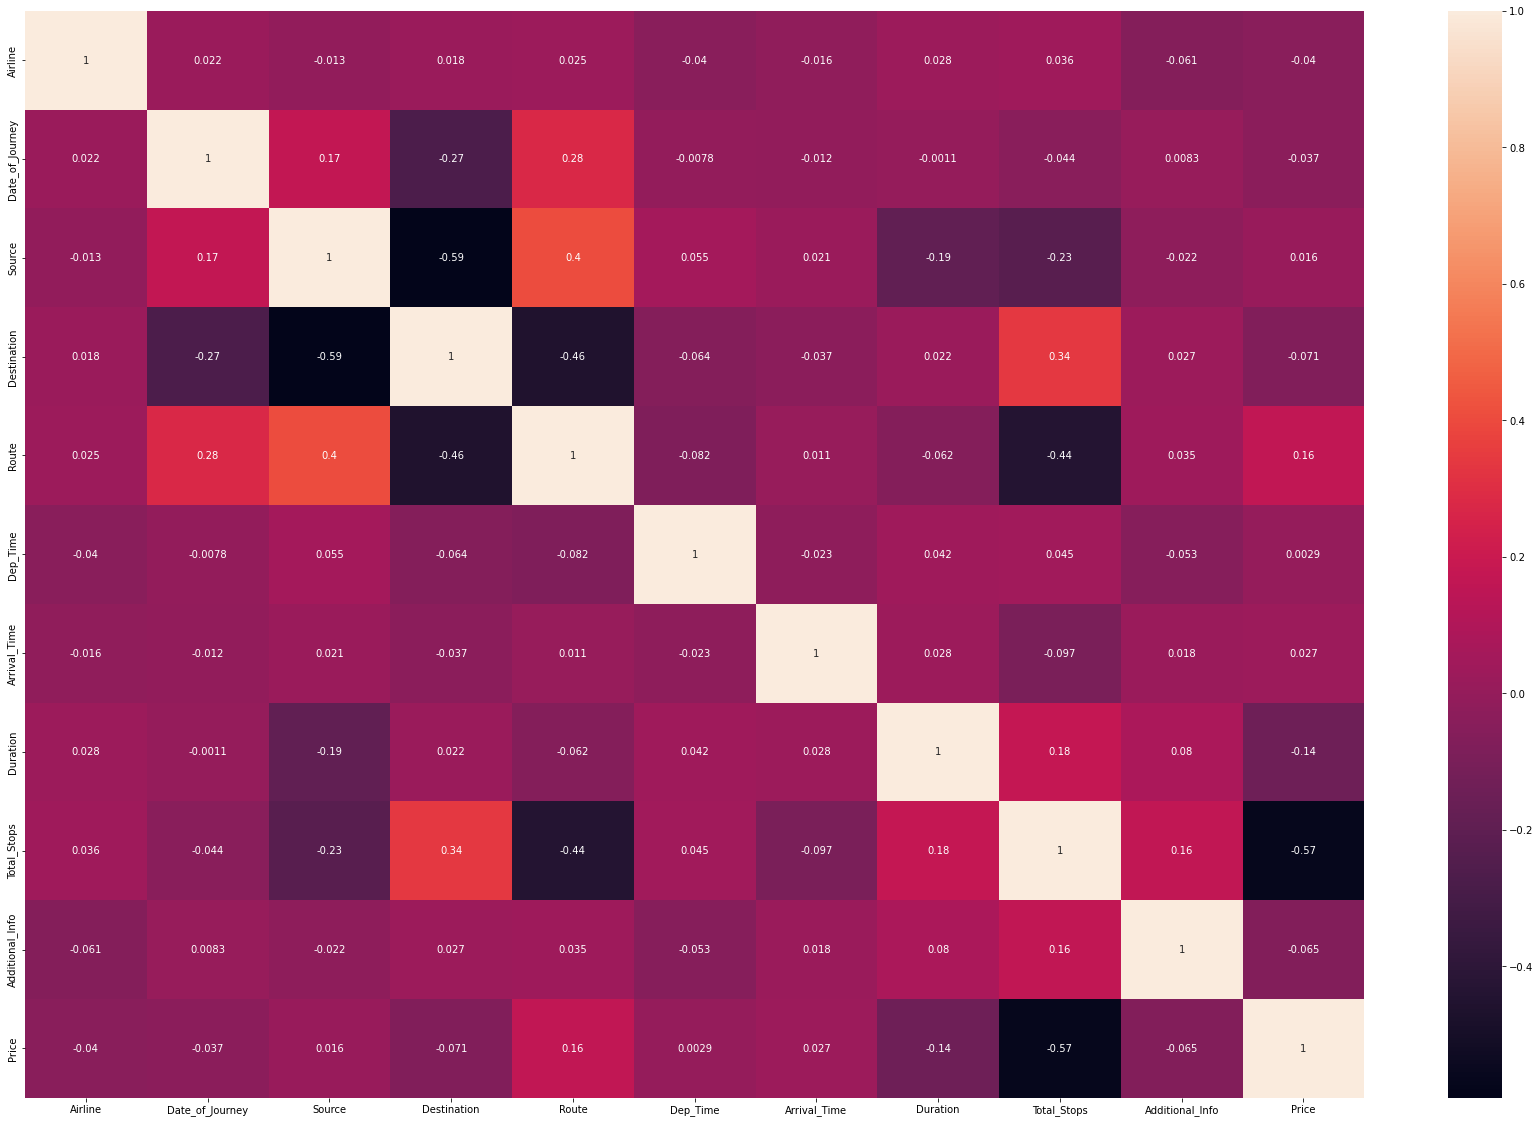

In [235]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

**There are no multicollinearity among the features**

**Let's check the correlation of the features with the target variable**

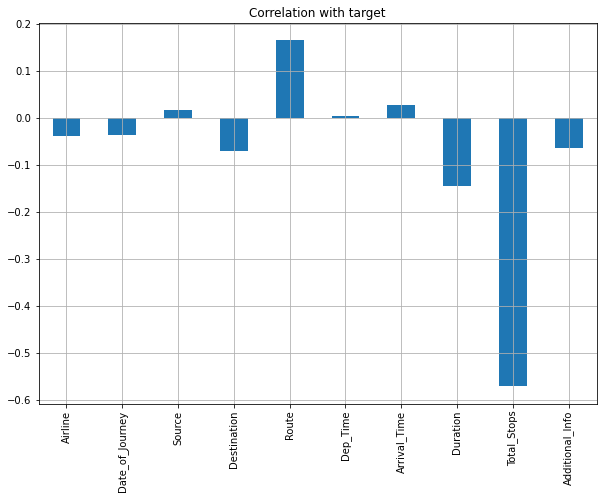

In [236]:
corr = data.drop('Price', axis = 1).corrwith(data.Price)

corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

**Total_Stops** and **Route** has the strongest and second strongest correlation with the target respectively followed by **Duration.**

In [237]:
x = data.drop('Price', axis = 1)
y = data.Price

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [239]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
lr = LinearRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBRegressor()
svc = SVC()
svr = SVR()

In [241]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [242]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9737116501140077
At random state 0, the testing accuracy is : 0.8587550687556337

At random state 1, the training accuracy is : 0.9724107504255217
At random state 1, the testing accuracy is : 0.8825296767054406

At random state 2, the training accuracy is : 0.9730038494936425
At random state 2, the testing accuracy is : 0.8881859084726549

At random state 3, the training accuracy is : 0.9729074886584631
At random state 3, the testing accuracy is : 0.8852189299805577

At random state 4, the training accuracy is : 0.9729768621032405
At random state 4, the testing accuracy is : 0.9091634920362021

At random state 5, the training accuracy is : 0.9702581557539667
At random state 5, the testing accuracy is : 0.9033158650631865

At random state 6, the training accuracy is : 0.9732546110451513
At random state 6, the testing accuracy is : 0.8708868095600635

At random state 7, the training accuracy is : 0.9717427787242524
At random state 7, the te

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 13)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [244]:
y_test_pred = xgb.predict(x_test)
print(f"The accuracy score is {r2_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 91.51 %


### Cross Validation

In [245]:
test_acc = r2_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(xgb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 86.5714 and accuracy for testing = 91.5090

At cv = 3,cv_score = 88.1549 and accuracy for testing = 91.5090

At cv = 4,cv_score = 89.3816 and accuracy for testing = 91.5090

At cv = 5,cv_score = 89.6881 and accuracy for testing = 91.5090

At cv = 6,cv_score = 89.5064 and accuracy for testing = 91.5090

At cv = 7,cv_score = 89.6276 and accuracy for testing = 91.5090

At cv = 8,cv_score = 89.5735 and accuracy for testing = 91.5090

At cv = 9,cv_score = 89.5530 and accuracy for testing = 91.5090



In [246]:
cv_score = cross_val_score(xgb,x_scaled,y,cv = 5)
cv_mean = cv_score.mean()
cv_mean

0.8968810352447697

### L1 form

In [247]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [248]:
alpha = lasscv.alpha_
alpha

0.02938683488191629

In [249]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.02938683488191629)

In [250]:
lasso_reg.score(x_test,y_test)

0.35298664641214417

### L2 form

In [251]:
# L2 form
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [252]:
ridgecv.alpha_

0.001

In [253]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [254]:
ridge_model.score(x_test,y_test)

0.3529858403973426

### L1 and L2  are both around 0.3529 and they do not differ much, so our model does not overfit

### Now let's try to predict one of the prices and compare with the actual price.

In [255]:
data.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6293,3.0,15.0,1.0,4.0,127.0,179.0,1241.0,234.0,4.0,8.0,3597


In [256]:
print('Price of Flight is : ', xgb.predict(scaler.transform(([[3.0,15.0,1.0,4.0,127.0,179.0,1241.0,234.0,4.0,8.0]]))))

Price of Flight is :  [3755.5442]


**Actual price = 3597** 

**Predicted price = 3755.5442**

Percentage error = $\frac{[(Predicted)-(Actual)]*100}{(Actual)}=4.4$%

### Let's save the model for future prediction

In [257]:
import pickle
filename = 'flight_price_prediction.pickle'

pickle.dump(xgb,open(filename,'wb'))

Text(0.5, 1.0, 'Predicted vs Actual model')

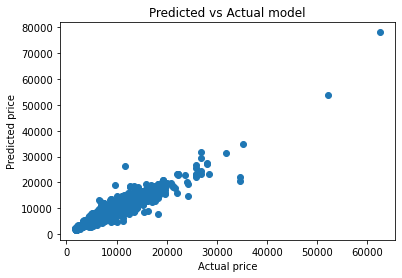

In [258]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual model')

# TEST DATA

In [259]:
test_data = pd.read_excel('C:/Users/HP/Documents/DataTrained/Evaluated Projects/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [260]:
test_data.shape

(2671, 10)

In [261]:
test_data.isna().sum().sum()

0

In [262]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Encoding the data

In [263]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = oe.fit_transform(test_data[i].values.reshape(-1,1))

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0


### Checking multicollinearity using heatmap

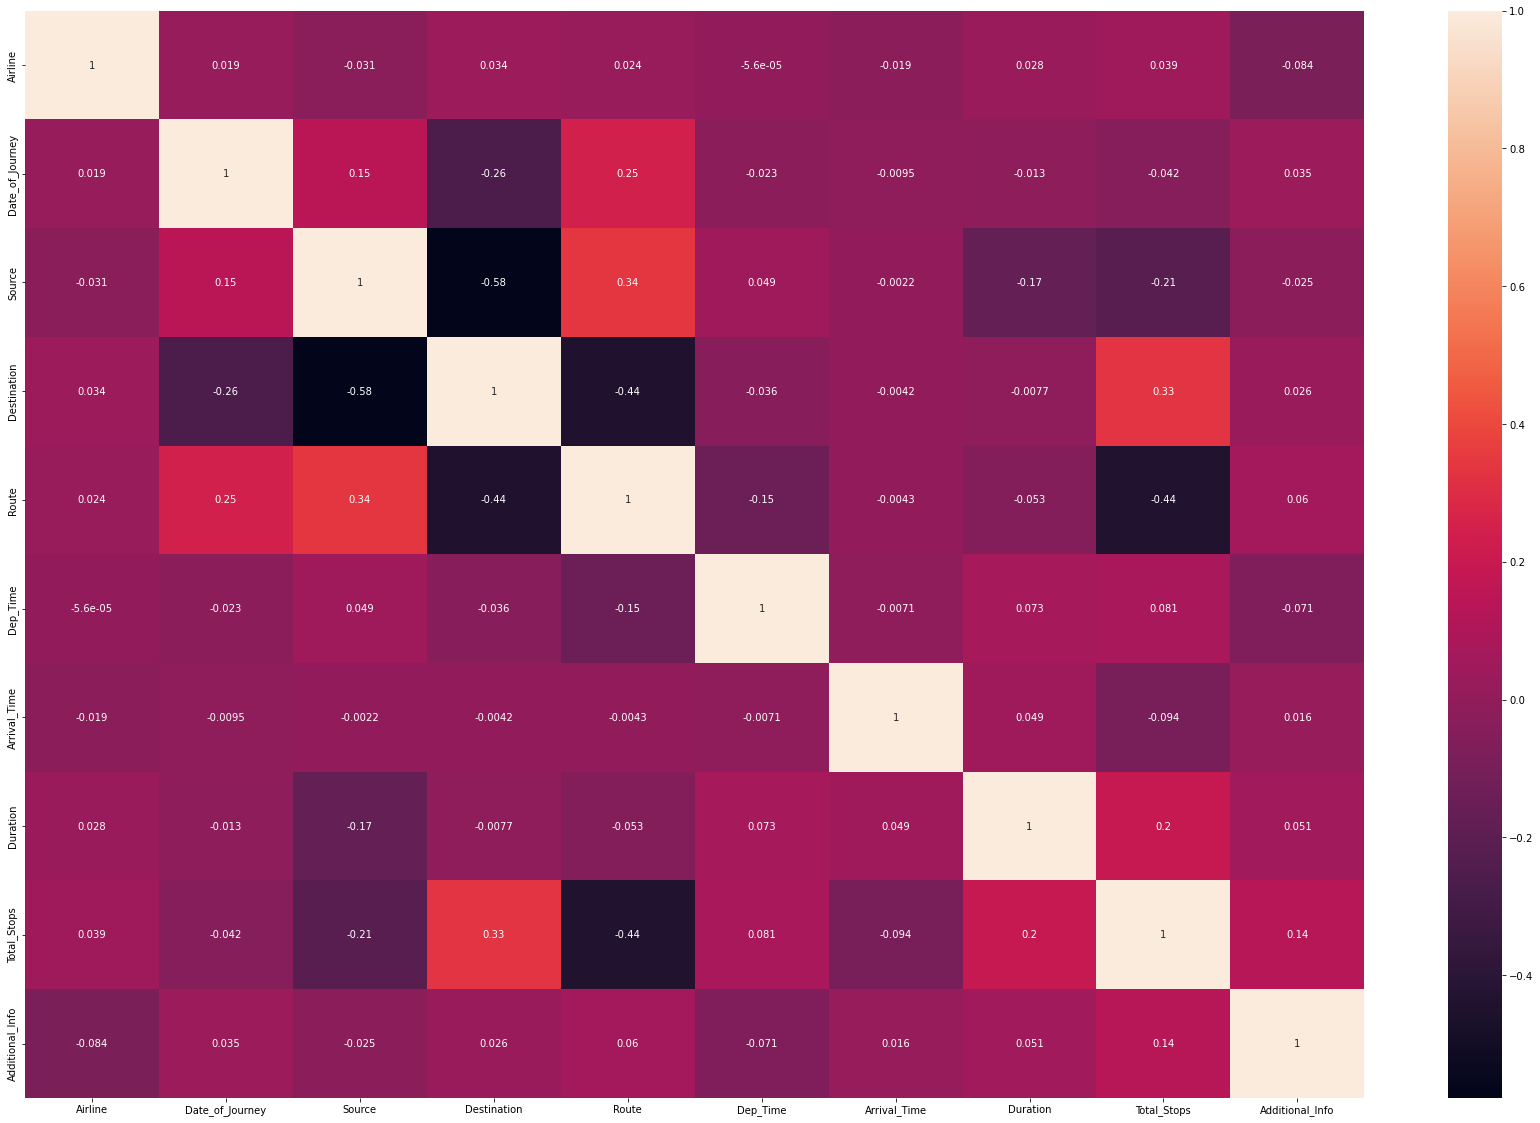

In [264]:
plt.figure(figsize=(30,20))
sns.heatmap(test_data.corr(),annot=True)
plt.show()

### There are no multicollinearity among the features

#### Let's proceed and feed this test_data to the previous model we've built and see how our model performs

In [265]:
# Scaling the data first

scaler = StandardScaler()
X_scaled = scaler.fit_transform(test_data)

In [267]:
# appending the predicted prices to an empty list

price = []
for i in range(0,len(Test_Data)):
    price.append(xgb.predict([Test_Data[i]]).tolist())

In [270]:
prices = sum(price,[]) #combining into a single list
print('\n ******* The predicted prices for test dataset is*******\n\n', prices)


 ******* The predicted prices for test dataset is*******

 [13631.16015625, 4610.8935546875, 10946.892578125, 11481.609375, 4147.53125, 10367.8115234375, 9039.380859375, 6964.2822265625, 4868.25, 12807.486328125, 10611.595703125, 5819.74658203125, 9973.1513671875, 13597.251953125, 10629.5732421875, 16641.92578125, 8132.0556640625, 7419.16455078125, 9708.328125, 14677.2138671875, 11935.3935546875, 8085.765625, 10672.7978515625, 12902.53515625, 5409.0859375, 7333.72607421875, 4851.6591796875, 14971.751953125, 10160.6845703125, 12472.3779296875, 4652.16357421875, 9956.1015625, 14434.71875, 8133.41162109375, 4967.18359375, 4147.67822265625, 7773.205078125, 27308.41015625, 8259.357421875, 9496.1787109375, 5367.75244140625, 9359.0693359375, 2618.80419921875, 8431.31640625, 6657.2421875, 5287.28271484375, 18072.09375, 4183.103515625, 11143.94921875, 11097.1796875, 12600.9345703125, 6665.96923828125, 13258.3388671875, 12211.1640625, 3693.59326171875, 7896.2470703125, 7090.1787109375, 7583.840